<a href="https://colab.research.google.com/github/vitor-freitas1/challenge-telecom-x-churn/blob/main/challenge_telecom_x_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 1. Extracão

In [48]:
import pandas as pd
import json
import requests

file_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = None

try:
  response = requests.get(file_url)
  response.raise_for_status()
  data_list = response.json()
  df = pd.json_normalize(data_list)
  print("Dataframe carregado e normalizado com sucesso!")
  print(df.head())

except requests.exceptions.RequestException as e_req:
  print(f"ERRO ao buscar dados da URL: {e_req}")

except json.JSONDecodeError as e_json:
  print(f"ERRO: Problema ao decodificar o JSON obtido da URL: {e_json}")

except Exception as e:
  print(f"ERRO: inesperado durante o carregamento da URL: {e}")

Dataframe carregado e normalizado com sucesso!
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes          

#🔧 2. Transformação

## 2.1 Conhecendo o Dataset

### 2.1.1 Visualizar amostras de dados

In [49]:
df.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [50]:
df.tail(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7257,9975-SKRNR,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.9
7258,9978-HYCIN,No,Male,1,Yes,Yes,47,Yes,No,Fiber optic,...,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),84.95,4018.05
7259,9979-RGMZT,No,Female,0,No,No,7,Yes,No,Fiber optic,...,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,94.05,633.45
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.5
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [51]:
df.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
5672,7750-EYXWZ,No,Female,0,No,No,12,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3
432,0620-DLSLK,No,Female,0,No,No,13,Yes,No,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,81.90,1028.9
4847,6631-HMANX,No,Male,0,Yes,No,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.45,6227.5
1444,2075-PUEPR,No,Male,0,Yes,Yes,55,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.35,1153.25
3296,4597-ELFTS,Yes,Male,0,No,No,56,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1334
5816,7963-GQRMY,Yes,Female,0,Yes,Yes,3,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,44.30,134.5
4915,6719-OXYBR,No,Male,0,No,No,15,Yes,No,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,85.30,1219.85
3399,4710-FDUIZ,Yes,Male,0,Yes,No,56,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,One year,No,Credit card (automatic),100.30,5614.45
68,0112-QWPNC,Yes,Male,0,Yes,No,49,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,84.35,4059.35
6793,9367-WXLCH,Yes,Male,0,No,No,8,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),84.50,662.65


### 2.1.2 Estrutura geral e tipo de dados

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [53]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


### 2.1.3 Dimensões do Dataset

In [54]:
df.shape

(7267, 21)

### 2.1.4 Nomes das colunas

In [55]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

## 2.2 Verificando inconsistências nos dados

### 2.2.1 Valores ausentes

In [56]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### 2.2.2 Valores duplicados

In [57]:
df.duplicated().sum()

np.int64(0)

### 2.2.3 Erros de formatação

In [58]:
print(" Iniciando inspeção de 'account.Charges.Total'...")

# Tenta converter para numérico com coercion
coluna_original = df['account.Charges.Total']
coluna_convertida = pd.to_numeric(coluna_original, errors='coerce')

# Identifica valores que não puderam ser convertidos
valores_invalidos = coluna_original[coluna_convertida.isnull()]

if not valores_invalidos.empty:
    print(f" {len(valores_invalidos)} valores problemáticos encontrados com: {valores_invalidos.unique()}")

else:
    print(" Nenhum valor problemático encontrado.")

# Aplica conversão definitiva
df['account.Charges.Total'] = coluna_convertida

# Resultado
nan_count = df['account.Charges.Total'].isnull().sum()
print(f" Total de NaNs após conversão: {nan_count}")
print(f" Tipo final da coluna: {df['account.Charges.Total'].dtype}")


 Iniciando inspeção de 'account.Charges.Total'...
 11 valores problemáticos encontrados com: [' ']
 Total de NaNs após conversão: 11
 Tipo final da coluna: float64


### 2.2.4 Inconsistências nos dados



✨**Verificando quais colunas possuem valores inconsistentes**✨




In [59]:
colunas_categoricas = [
    'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

print("\n--- Verificando Valores Únicos em Colunas Categóricas ---")
for coluna in colunas_categoricas:
    if coluna in df.columns:
        print(f"\nValores únicos para a coluna '{coluna}':")
        print(df[coluna].unique())
    else:
        print(f"\nColuna '{coluna}' não encontrada no DataFrame.")


--- Verificando Valores Únicos em Colunas Categóricas ---

Valores únicos para a coluna 'Churn':
['No' 'Yes' '']

Valores únicos para a coluna 'customer.gender':
['Female' 'Male']

Valores únicos para a coluna 'customer.Partner':
['Yes' 'No']

Valores únicos para a coluna 'customer.Dependents':
['Yes' 'No']

Valores únicos para a coluna 'phone.PhoneService':
['Yes' 'No']

Valores únicos para a coluna 'phone.MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos para a coluna 'internet.InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos para a coluna 'internet.OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos para a coluna 'internet.OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos para a coluna 'internet.DeviceProtection':
['No' 'Yes' 'No internet service']

Valores únicos para a coluna 'internet.TechSupport':
['Yes' 'No' 'No internet service']

Valores únicos para a coluna 'internet.StreamingTV':
['Yes' 'No' 'No internet service']



✨**Substituindo os valores em branco por nan**✨




In [60]:
import numpy as np

# Definir o valor que queremos encontrar e substituir
valor_problematico = ''

# Contar quantas strings vazias existem na coluna 'Churn'
contagem_problema_churn = (df['Churn'] == valor_problematico).sum()

if contagem_problema_churn > 0:
    print(f"Encontrados {contagem_problema_churn} registros com string vazia ('{valor_problematico}') na coluna 'Churn'.")

    # Substituir string vazia por NaN
    df['Churn'] = df['Churn'].replace(valor_problematico, np.nan)

    print(f"Strings vazias ('{valor_problematico}') na coluna 'Churn' foram substituídas por NaN.")

    # Verificar os valores únicos novamente para confirmar a mudança
    print("\nValores únicos para a coluna 'Churn' após a correção:")
    print(df['Churn'].unique())

    # Verificar a contagem de valores ausentes (NaN) em 'Churn' agora
    print(f"\nTotal de valores ausentes (NaN) em 'Churn' após a correção: {df['Churn'].isnull().sum()}")
else:
    print(f"Nenhuma string vazia ('{valor_problematico}') encontrada na coluna 'Churn' para corrigir.")

Encontrados 224 registros com string vazia ('') na coluna 'Churn'.
Strings vazias ('') na coluna 'Churn' foram substituídas por NaN.

Valores únicos para a coluna 'Churn' após a correção:
['No' 'Yes' nan]

Total de valores ausentes (NaN) em 'Churn' após a correção: 224


## 2.3 Tratando as inconsistências

### ✨Removendo as linhas com valores NaNs da coluna Churn✨

In [61]:
print(f"Tamanho do DataFrame antes de remover NaNs da coluna 'Churn': {df.shape}")

# Remover linhas onde a coluna 'Churn' é NaN
df.dropna(subset=['Churn'], inplace=True)

print(f"Tamanho do DataFrame depois de remover NaNs da coluna 'Churn': {df.shape}")

# Verificar novamente os valores ausentes e únicos em 'Churn'
print(f"\nTotal de valores ausentes (NaN) em 'Churn' após remover as linhas: {df['Churn'].isnull().sum()}")
print(f"Valores únicos para a coluna 'Churn' após remover as linhas: {df['Churn'].unique()}")

Tamanho do DataFrame antes de remover NaNs da coluna 'Churn': (7267, 21)
Tamanho do DataFrame depois de remover NaNs da coluna 'Churn': (7043, 21)

Total de valores ausentes (NaN) em 'Churn' após remover as linhas: 0
Valores únicos para a coluna 'Churn' após remover as linhas: ['No' 'Yes']


### ✨Investigando valores NaNs da coluna account.Charges.Total✨

In [62]:
# Célula de Investigação dos NaNs em account.Charges.Total
if df is not None and 'account.Charges.Total' in df.columns:
    clientes_total_nan = df[df['account.Charges.Total'].isnull()]
    if not clientes_total_nan.empty:
        print("Clientes com account.Charges.Total ausente:")
        print(clientes_total_nan[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']])
        print(f"\nValores únicos de 'customer.tenure' para clientes com TotalCharges NaN: {clientes_total_nan['customer.tenure'].unique()}")
    else:
        print("Nenhum NaN encontrado em account.Charges.Total nesta etapa")

Clientes com account.Charges.Total ausente:
      customer.tenure  account.Charges.Monthly  account.Charges.Total
975                 0                    56.05                    NaN
1775                0                    20.00                    NaN
1955                0                    61.90                    NaN
2075                0                    19.70                    NaN
2232                0                    20.25                    NaN
2308                0                    25.35                    NaN
2930                0                    73.35                    NaN
3134                0                    25.75                    NaN
3203                0                    52.55                    NaN
4169                0                    80.85                    NaN
5599                0                    19.85                    NaN

Valores únicos de 'customer.tenure' para clientes com TotalCharges NaN: [0]


### ✨**Tratando os valores NaN presentes na coluna account.Charges.Total**✨

In [63]:
nan_antes_tratamento_final = df['account.Charges.Total'].isnull().sum()

if nan_antes_tratamento_final > 0:
    print(f"Tratando {nan_antes_tratamento_final} NaNs restantes em 'account.Charges.Total'")
    df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0.0)
    print("NaNs em 'account.Charges.Total' foram preenchidos com 0.0.")
    print(f"Valores ausentes em 'account.Charges.Total' Após o preenchimento: {df['account.Charges.Total'].isnull().sum()}")

else:
    print("Nenhum NaN encontrado em 'account.Charges.Total' para tratar (talvez já foram tratados).")

Tratando 11 NaNs restantes em 'account.Charges.Total'
NaNs em 'account.Charges.Total' foram preenchidos com 0.0.
Valores ausentes em 'account.Charges.Total' Após o preenchimento: 0


✨**Após o tratamento de dados**✨

In [64]:
print("\nVerificação final de valores ausentes em todo o DataFrame:")
print(df.isnull().sum().sum())


Verificação final de valores ausentes em todo o DataFrame:
0


## 2.4 Coluna de Contas Diárias

In [65]:
# Definir o número de dias no mês para o cálculo
dias_no_mes = 30.4375

# Criar a nova coluna 'Contas_Diarias'
if 'account.Charges.Monthly' in df.columns:
    df['Contas_Diarias'] = df['account.Charges.Monthly'] / dias_no_mes
    print("Coluna 'Contas_Diarias' criada com sucesso!")

    # Verificar as primeiras linhas com a nova coluna e o tipo de dado
    print("\nPrimeiras linhas do DataFrame com a nova coluna 'Contas_Diarias':")
    print(df[['customerID', 'account.Charges.Monthly', 'Contas_Diarias']].head())
    print(f"\nTipo de dado da coluna 'Contas_Diarias': {df['Contas_Diarias'].dtype}")

    # Algumas estatísticas descritivas da nova coluna
    print("\nEstatísticas descritivas para 'Contas_Diarias':")
    print(df['Contas_Diarias'].describe())

else:
    print("ERRO: Coluna 'account.Charges.Monthly' não encontrada no DataFrame.")

Coluna 'Contas_Diarias' criada com sucesso!

Primeiras linhas do DataFrame com a nova coluna 'Contas_Diarias':
   customerID  account.Charges.Monthly  Contas_Diarias
0  0002-ORFBO                     65.6        2.155236
1  0003-MKNFE                     59.9        1.967967
2  0004-TLHLJ                     73.9        2.427926
3  0011-IGKFF                     98.0        3.219713
4  0013-EXCHZ                     83.9        2.756468

Tipo de dado da coluna 'Contas_Diarias': float64

Estatísticas descritivas para 'Contas_Diarias':
count    7043.000000
mean        2.127694
std         0.988585
min         0.599589
25%         1.166324
50%         2.311294
75%         2.951951
max         3.901437
Name: Contas_Diarias, dtype: float64


## 2.5 Padronização e Transformação de Dados (opcional)

### Convertendo valores textuais como "Sim" e "Não" para valores binários (1 e 2)

In [66]:
colunas_para_mapear = ['Churn', 'customer.Partner', 'customer.Dependents',
                             'phone.PhoneService', 'account.PaperlessBilling']

print("\n--- Convertendo colunas Yes/No para 1/0 ---")
for coluna in colunas_para_mapear:
    if coluna in df.columns:
        print(f"Processando coluna: {coluna}")
        df[coluna] = df[coluna].map({'Yes': 1, 'No': 0})

        # Verificar os novos valores únicos e o tipo
        print(f"Valores únicos em '{coluna}' após map: {df[coluna].unique()}")
        print(f"Tipo de '{coluna}' após map: {df[coluna].dtype}\n")

    else:
        print(f"AVISO: Coluna '{coluna}' não encontrada para mapeamento Yes/No.")


--- Convertendo colunas Yes/No para 1/0 ---
Processando coluna: Churn
Valores únicos em 'Churn' após map: [0 1]
Tipo de 'Churn' após map: int64

Processando coluna: customer.Partner
Valores únicos em 'customer.Partner' após map: [1 0]
Tipo de 'customer.Partner' após map: int64

Processando coluna: customer.Dependents
Valores únicos em 'customer.Dependents' após map: [1 0]
Tipo de 'customer.Dependents' após map: int64

Processando coluna: phone.PhoneService
Valores únicos em 'phone.PhoneService' após map: [1 0]
Tipo de 'phone.PhoneService' após map: int64

Processando coluna: account.PaperlessBilling
Valores únicos em 'account.PaperlessBilling' após map: [1 0]
Tipo de 'account.PaperlessBilling' após map: int64



In [67]:
colunas_addons_internet = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

print("\n--- Convertendo colunas de addons de internet para 1/0 ---")
mapa_addons = {'Yes': 1, 'No': 0, 'No internet service': 0}

for coluna in colunas_addons_internet:
    if coluna in df.columns:
        print(f"Processando coluna: {coluna}")
        df[coluna] = df[coluna].map(mapa_addons)

        # Verificar os novos valores únicos e o tipo
        print(f"Valores únicos em '{coluna}' após map: {df[coluna].unique()}")
        print(f"Tipo de '{coluna}' após map: {df[coluna].dtype}")

    else:
        print(f"AVISO: Coluna '{coluna}' não encontrada para mapeamento de addons de internet.")


--- Convertendo colunas de addons de internet para 1/0 ---
Processando coluna: internet.OnlineSecurity
Valores únicos em 'internet.OnlineSecurity' após map: [0 1]
Tipo de 'internet.OnlineSecurity' após map: int64
Processando coluna: internet.OnlineBackup
Valores únicos em 'internet.OnlineBackup' após map: [1 0]
Tipo de 'internet.OnlineBackup' após map: int64
Processando coluna: internet.DeviceProtection
Valores únicos em 'internet.DeviceProtection' após map: [0 1]
Tipo de 'internet.DeviceProtection' após map: int64
Processando coluna: internet.TechSupport
Valores únicos em 'internet.TechSupport' após map: [1 0]
Tipo de 'internet.TechSupport' após map: int64
Processando coluna: internet.StreamingTV
Valores únicos em 'internet.StreamingTV' após map: [1 0]
Tipo de 'internet.StreamingTV' após map: int64
Processando coluna: internet.StreamingMovies
Valores únicos em 'internet.StreamingMovies' após map: [0 1]
Tipo de 'internet.StreamingMovies' após map: int64


In [68]:
# Para phone.MultipleLines
if 'phone.MultipleLines' in df.columns:
    print("\nProcessando coluna: phone.MultipleLines")
    df['phone.MultipleLines'] = df['phone.MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
    print(f"Valores únicos em 'phone.MultipleLines' após map: {df['phone.MultipleLines'].unique()}")
    print(f"Tipo de 'phone.MultipleLines' após map: {df['phone.MultipleLines'].dtype}")


Processando coluna: phone.MultipleLines
Valores únicos em 'phone.MultipleLines' após map: [0 1]
Tipo de 'phone.MultipleLines' após map: int64


### Renomeando colunas

In [69]:
print("Nomes das colunas antes da substituição:")
print(df.columns.tolist())

# Substituir o '.' por '_' em todos os nomes de colunas
df.columns = df.columns.str.replace('.', '_', regex=False)

print("\nNomes das colunas depois da substituição:")
print(df.columns.tolist())

Nomes das colunas antes da substituição:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']

Nomes das colunas depois da substituição:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'ac

# 📊 3. Carga e análise

## 3.1 Análise descritiva

In [70]:
print("--- Análise Descritiva Geral do DataFrame ---")
descritiva_geral = df.describe(include='all')
print(descritiva_geral)

--- Análise Descritiva Geral do DataFrame ---
        customerID        Churn customer_gender  customer_SeniorCitizen  \
count         7043  7043.000000            7043             7043.000000   
unique        7043          NaN               2                     NaN   
top     9995-HOTOH          NaN            Male                     NaN   
freq             1          NaN            3555                     NaN   
mean           NaN     0.265370             NaN                0.162147   
std            NaN     0.441561             NaN                0.368612   
min            NaN     0.000000             NaN                0.000000   
25%            NaN     0.000000             NaN                0.000000   
50%            NaN     0.000000             NaN                0.000000   
75%            NaN     1.000000             NaN                0.000000   
max            NaN     1.000000             NaN                1.000000   

        customer_Partner  customer_Dependents  custom

### Analise de colunas restantes

In [71]:
colunas_categoricas_restantes = [
    'customer_gender',
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]

print("--- Proporções para Colunas Categóricas Restantes ---")
for coluna in colunas_categoricas_restantes:
    if coluna in df.columns:
        print(f"\n--- Análise da Coluna: {coluna} ---")
        print("Contagem de cada categoria:")
        print(df[coluna].value_counts(dropna=False))
        print(f"\nProporção de cada categoria (%):")
        print(df[coluna].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    else:
        print(f"ERRO: Coluna '{coluna}' não encontrada.")

--- Proporções para Colunas Categóricas Restantes ---

--- Análise da Coluna: customer_gender ---
Contagem de cada categoria:
customer_gender
Male      3555
Female    3488
Name: count, dtype: int64

Proporção de cada categoria (%):
customer_gender
Male      50.48%
Female    49.52%
Name: proportion, dtype: object

--- Análise da Coluna: internet_InternetService ---
Contagem de cada categoria:
internet_InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Proporção de cada categoria (%):
internet_InternetService
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: proportion, dtype: object

--- Análise da Coluna: account_Contract ---
Contagem de cada categoria:
account_Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Proporção de cada categoria (%):
account_Contract
Month-to-month    55.02%
Two year          24.07%
One year          20.91%
Name: proportion, dtype: o

## 3.2 Distribuição da Evasão

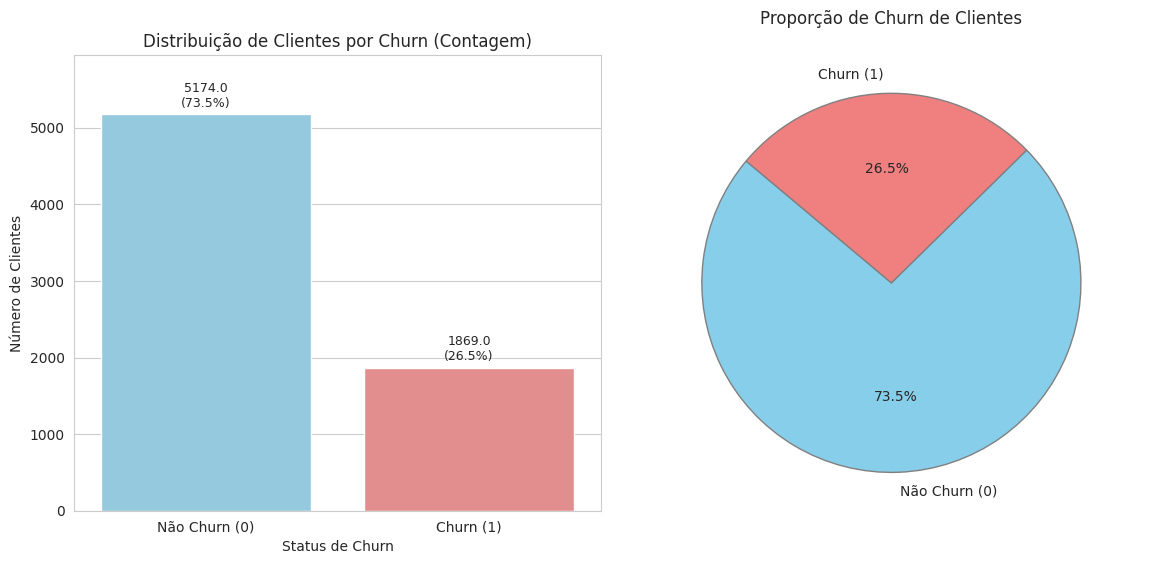

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

if 'Churn' in df.columns and df['Churn'].isin([0, 1]).all():

    # 1. Gráfico de Barras (Contagem) com Seaborn (COM AJUSTES)
    plt.subplot(1, 2, 1)
    ax_countplot = sns.countplot(
        x='Churn',
        data=df,
        hue='Churn',
        palette=['skyblue', 'lightcoral'],
        order=[0, 1],
        legend=False
    )
    plt.title('Distribuição de Clientes por Churn (Contagem)')
    plt.xlabel('Status de Churn')
    plt.ylabel('Número de Clientes')

    ax_countplot.set_xticks([0, 1])
    ax_countplot.set_xticklabels(['Não Churn (0)', 'Churn (1)'])
    ax_countplot.margins(y=0.15)

    for p in ax_countplot.patches:
        height = p.get_height()
        ax_countplot.text(p.get_x() + p.get_width() / 2.,
                height + (ax_countplot.get_ylim()[1] * 0.01),
                f'{height}\n({height / len(df) * 100:.1f}%)',
                ha="center", va="bottom", fontsize=9)

    # 2. Gráfico de Pizza com Matplotlib
    plt.subplot(1, 2, 2)
    churn_counts = df['Churn'].value_counts().sort_index()
    labels = ['Não Churn (0)', 'Churn (1)']
    colors = ['skyblue', 'lightcoral']

    if len(churn_counts) == 2:
        plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'grey'})
        plt.title('Proporção de Churn de Clientes', y=1.05)
        plt.axis('equal')
    elif len(churn_counts) == 1:
        category = churn_counts.index[0]
        label_category = labels[category]
        plt.pie(churn_counts, labels=[label_category], colors=[colors[category]], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'grey'})
        plt.title(f'Proporção de Churn de Clientes (Todos são {label_category})', y=1.05)
        plt.axis('equal')
    else:
        plt.text(0.5, 0.5, 'Dados de Churn insuficientes para gráfico de pizza.', horizontalalignment='center', verticalalignment='center')
        plt.title('Proporção de Churn de Clientes', y=1.05)


    plt.tight_layout(pad=2.0)
    plt.show()

else:
    print("ERRO: A coluna 'Churn' não foi encontrada ou não está no formato binário (0 e 1) esperado.")
    if 'Churn' in df.columns:
        print(f"Valores únicos atuais em 'Churn': {df['Churn'].unique()}")
        print(f"Tipo de dado atual de 'Churn': {df['Churn'].dtype}")

## 3.3 Contagem de Evasão por Variáveis Categóricas

### 3.3.1 Evasão x Gênero do Cliente


--- Análise de Churn por: Gênero de Cliente ---

Taxa de Churn (proporção de '1') por Categoria:
Churn                 0       1
customer_gender                
Female           73.08%  26.92%
Male             73.84%  26.16%


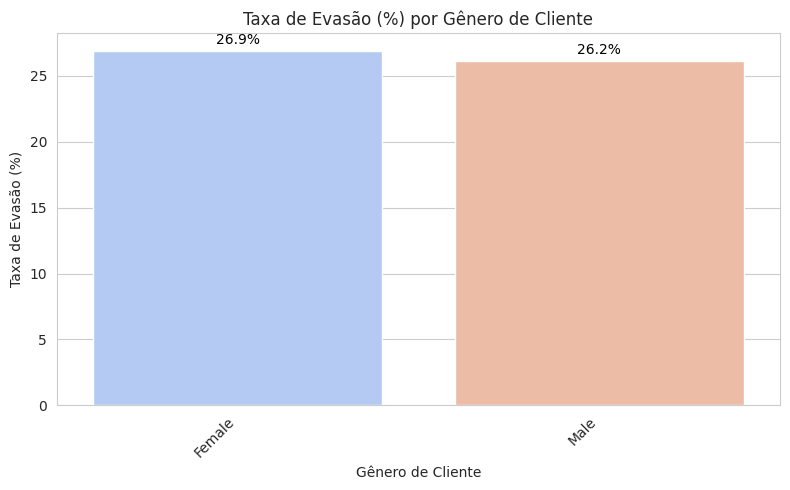

In [73]:
coluna_cat_analise = 'customer_gender'

if coluna_cat_analise in df.columns:
    print(f"\n--- Análise de Churn por: Gênero de Cliente ---")

    # Taxa de Churn por Categoria
    print("\nTaxa de Churn (proporção de '1') por Categoria:")
    taxa_churn_crosstab = pd.crosstab(df[coluna_cat_analise], df['Churn'], normalize='index') * 100
    print(taxa_churn_crosstab.round(2).astype(str) + '%')

    # Visualização da Taxa de Churn por Categoria (Barplot)
    taxa_churn_para_plot = df.groupby(coluna_cat_analise)['Churn'].mean().mul(100).sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=taxa_churn_para_plot.index, y=taxa_churn_para_plot.values, hue=taxa_churn_para_plot.index,
    palette="coolwarm", legend=False)
    plt.title(f'Taxa de Evasão (%) por Gênero de Cliente')
    plt.ylabel('Taxa de Evasão (%)')
    plt.xlabel('Gênero de Cliente')
    plt.xticks(rotation=45, ha='right')

    # Adicionar anotações de percentual nas barras
    for i, v in enumerate(taxa_churn_para_plot.values):
        plt.text(i, v + 0.5, f"{v:.1f}%", color='black', ha="center")
    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_cat_analise}' não encontrada.")

### 3.3.2 Evasão x Cliente com Parceiro


--- Análise de Evasão por: Clientes com Parceiro(a) ---

Taxa de Churn (proporção de '1') por Categoria:
customer_Partner
0    32.96%
1    19.66%
Name: Churn, dtype: object


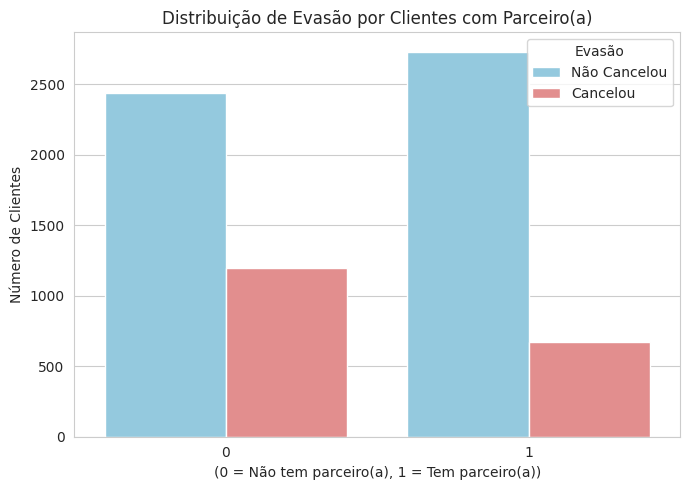

In [74]:
coluna_bin_analise = 'customer_Partner'

if coluna_bin_analise in df.columns:
    print(f"\n--- Análise de Evasão por: Clientes com Parceiro(a) ---")

    # Taxa de Churn
    taxa_churn_bin = df.groupby(coluna_bin_analise)['Churn'].mean().mul(100)
    print("\nTaxa de Churn (proporção de '1') por Categoria:")
    print(taxa_churn_bin.round(2).astype(str) + '%') # (0=Não tem parceiro, 1=Tem parceiro)

    # Visualização com countplot
    plt.figure(figsize=(7, 5))
    sns.countplot(x=coluna_bin_analise, hue='Churn', data=df, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribuição de Evasão por Clientes com Parceiro(a)')
    plt.ylabel('Número de Clientes')
    plt.xlabel('(0 = Não tem parceiro(a), 1 = Tem parceiro(a))')
    plt.legend(title='Evasão', labels=['Não Cancelou', 'Cancelou'])
    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_bin_analise}' não encontrada.")

### 3.3.3 Evasão por Método de Pagamento


--- Análise de Evasão por: Método de Pagamento ---

Taxa de Evasão (proporção de '1') por Categoria:
account_PaymentMethod
Bank transfer (automatic)    16.71%
Credit card (automatic)      15.24%
Electronic check             45.29%
Mailed check                 19.11%
Name: Churn, dtype: object


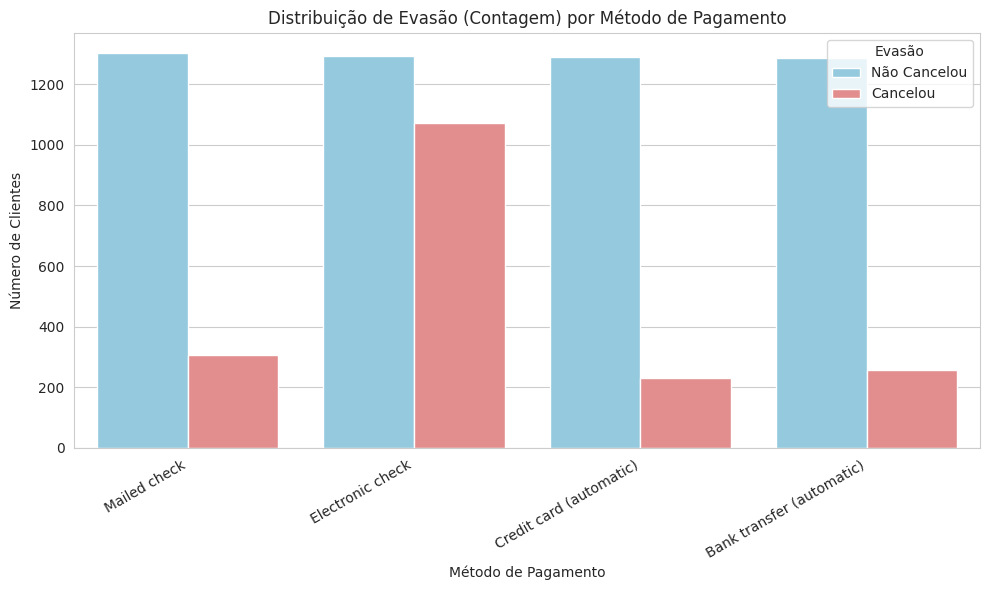

In [75]:
coluna_a_analisar = 'account_PaymentMethod'

if coluna_a_analisar in df.columns:
    print(f"\n--- Análise de Evasão por: Método de Pagamento ---")

    # Taxa de Churn
    taxa_churn_calculada = df.groupby(coluna_a_analisar)['Churn'].mean().mul(100)
    print("\nTaxa de Evasão (proporção de '1') por Categoria:")
    print(taxa_churn_calculada.round(2).astype(str) + '%')

    # Visualização com countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=coluna_a_analisar, hue='Churn', data=df, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribuição de Evasão (Contagem) por Método de Pagamento')
    plt.ylabel('Número de Clientes')
    plt.xlabel('Método de Pagamento')
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Evasão', labels=['Não Cancelou', 'Cancelou'])
    plt.tight_layout()
    plt.show()


else:
    print(f"ERRO: Coluna '{coluna_a_analisar}' não encontrada.")

### 3.3.4 Evasão x Tipo de Contrato


--- Análise de Churn por: account_Contract ---

Taxa de Churn (proporção de '1') por Categoria:
Churn                  0       1
account_Contract                
Month-to-month    57.29%  42.71%
One year          88.73%  11.27%
Two year          97.17%   2.83%


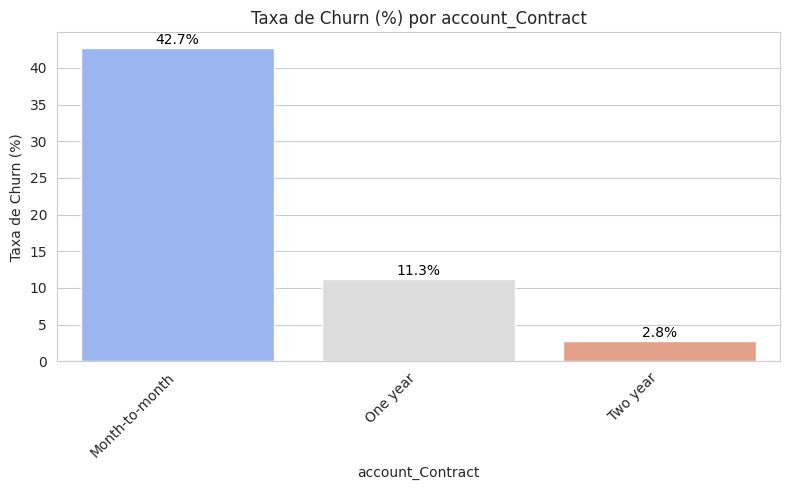

In [76]:
# --- Exemplo 1: account_Contract (Múltiplas Categorias de Texto) ---
coluna_cat_analise = 'account_Contract'

if coluna_cat_analise in df.columns:
    print(f"\n--- Análise de Churn por: {coluna_cat_analise} ---")

    # Taxa de Churn por Categoria
    print("\nTaxa de Churn (proporção de '1') por Categoria:")
    taxa_churn_crosstab = pd.crosstab(df[coluna_cat_analise], df['Churn'], normalize='index') * 100
    print(taxa_churn_crosstab.round(2).astype(str) + '%')

    # Visualização da Taxa de Churn por Categoria (Barplot)
    taxa_churn_para_plot = df.groupby(coluna_cat_analise)['Churn'].mean().mul(100).sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=taxa_churn_para_plot.index, y=taxa_churn_para_plot.values, hue=taxa_churn_para_plot.index,
    palette="coolwarm", legend=False)
    plt.title(f'Taxa de Churn (%) por {coluna_cat_analise}')
    plt.ylabel('Taxa de Churn (%)')
    plt.xlabel(coluna_cat_analise)
    plt.xticks(rotation=45, ha='right')

    # Adicionar anotações de percentual nas barras
    for i, v in enumerate(taxa_churn_para_plot.values):
        plt.text(i, v + 0.5, f"{v:.1f}%", color='black', ha="center")
    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_cat_analise}' não encontrada.")

## 3.4 Contagem de Evasão por Variáveis Numéricas

### 3.4.1 Contagem de Evasão por Tempo de Contrato


--- Análise de Churn por Variável Numérica: customer_tenure ---

Estatísticas Descritivas por grupo de Evasão:
        mean  median    std  min  max
Churn                                
0      37.57    38.0  24.11    0   72
1      17.98    10.0  19.53    1   72


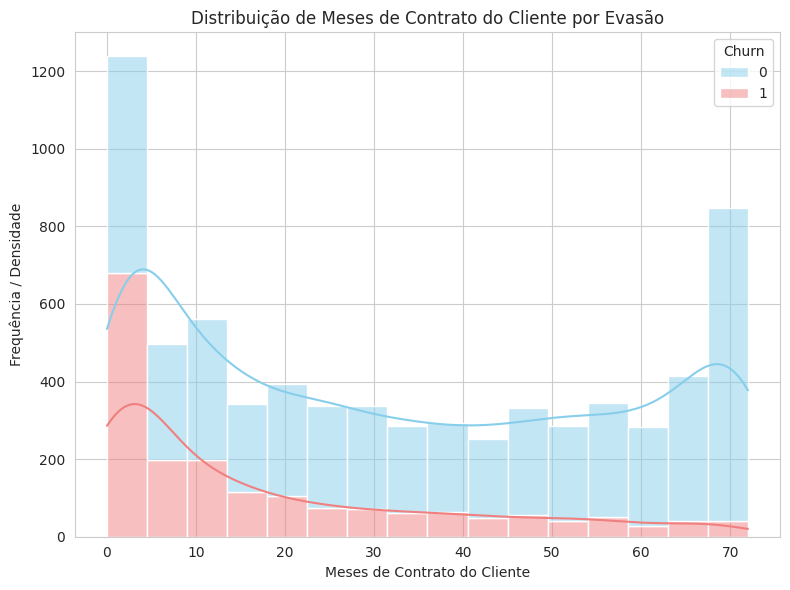

In [77]:
coluna_numerica_analise = 'customer_tenure'

if coluna_numerica_analise in df.columns:
    print(f"\n--- Análise de Churn por Variável Numérica: {coluna_numerica_analise} ---")

    # Estatísticas Descritivas por Grupo de Churn
    print("\nEstatísticas Descritivas por grupo de Evasão:")
    # Usando agg para selecionar métricas específicas:
    desc_stats_churn = df.groupby('Churn')[coluna_numerica_analise].agg(['mean', 'median', 'std', 'min', 'max'])
    print(desc_stats_churn.round(2))

    # Visualizações Comparativas
    plt.figure(figsize=(8, 6))

    # Histograma/KDE Sobreposto
    sns.histplot(data=df, x=coluna_numerica_analise, hue='Churn', kde=True, palette=['skyblue', 'lightcoral'], multiple="stack")
    plt.title(f'Distribuição de Meses de Contrato do Cliente por Evasão')
    plt.xlabel('Meses de Contrato do Cliente')
    plt.ylabel('Frequência / Densidade')

    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_numerica_analise}' não encontrada.")

### 3.4.2 Contagem de Evasão por Total Gasto por Mês


--- Análise de Evasão por Variável Numérica: Gasto Mensal ---

Estatísticas Descritivas por grupo de Evasão:
        mean  median    std    min     max
Churn                                     
0      61.27   64.43  31.09  18.25  118.75
1      74.44   79.65  24.67  18.85  118.35


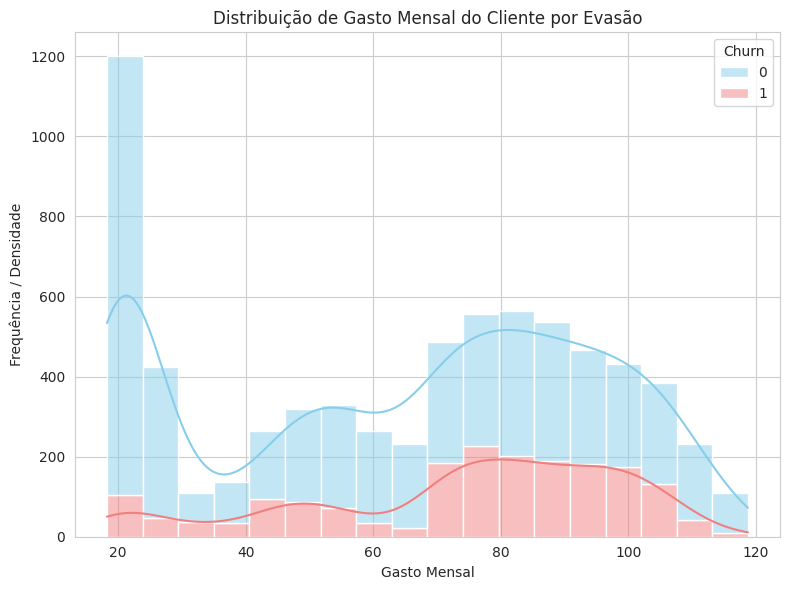

In [78]:
coluna_numerica_analise = 'account_Charges_Monthly'

if coluna_numerica_analise in df.columns:
    print(f"\n--- Análise de Evasão por Variável Numérica: Gasto Mensal ---")

    # Estatísticas Descritivas por Grupo de Churn
    print("\nEstatísticas Descritivas por grupo de Evasão:")
    # Usando agg para selecionar métricas específicas:
    desc_stats_churn = df.groupby('Churn')[coluna_numerica_analise].agg(['mean', 'median', 'std', 'min', 'max'])
    print(desc_stats_churn.round(2))

    # Visualizações Comparativas
    plt.figure(figsize=(8, 6))

    # Histograma/KDE Sobreposto
    sns.histplot(data=df, x=coluna_numerica_analise, hue='Churn', kde=True, palette=['skyblue', 'lightcoral'], multiple="stack")
    plt.title(f'Distribuição de Gasto Mensal do Cliente por Evasão')
    plt.xlabel('Gasto Mensal')
    plt.ylabel('Frequência / Densidade')

    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_numerica_analise}' não encontrada.")

### 3.4.3 Contagem de Evasão por Total Gasto pelo Cliente


--- Análise de Evasão por Variável Numérica: Gasto Total ---

Estatísticas Descritivas por grupo de Evasão:
          mean   median      std    min      max
Churn                                           
0      2549.91  1679.52  2329.95   0.00  8672.45
1      1531.80   703.55  1890.82  18.85  8684.80


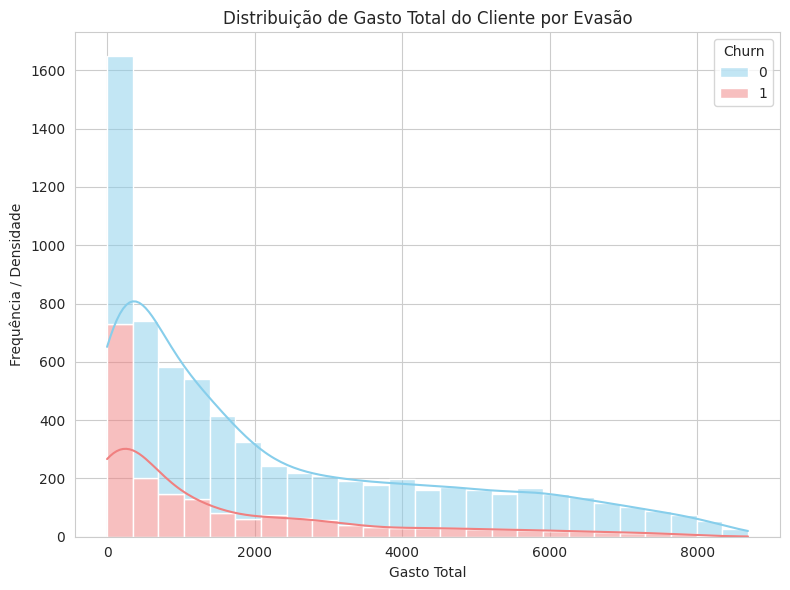

In [46]:
coluna_numerica_analise = 'account_Charges_Total'

if coluna_numerica_analise in df.columns:
    print(f"\n--- Análise de Evasão por Variável Numérica: Gasto Total ---")

    # Estatísticas Descritivas por Grupo de Churn
    print("\nEstatísticas Descritivas por grupo de Evasão:")
    # Usando agg para selecionar métricas específicas:
    desc_stats_churn = df.groupby('Churn')[coluna_numerica_analise].agg(['mean', 'median', 'std', 'min', 'max'])
    print(desc_stats_churn.round(2))

    # Visualizações Comparativas
    plt.figure(figsize=(8, 6))

    # Histograma/KDE Sobreposto
    sns.histplot(data=df, x=coluna_numerica_analise, hue='Churn', kde=True, palette=['skyblue', 'lightcoral'], multiple="stack")
    plt.title(f'Distribuição de Gasto Total do Cliente por Evasão')
    plt.xlabel('Gasto Total')
    plt.ylabel('Frequência / Densidade')

    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_numerica_analise}' não encontrada.")

### 3.4.4 Contagem de Evasão por Total Gasto Diário


--- Análise de Evasão por Variável Numérica: Gasto Total Diário ---

Estatísticas Descritivas por grupo de Evasão:
       mean  median   std   min   max
Churn                                
0      2.01    2.12  1.02  0.60  3.90
1      2.45    2.62  0.81  0.62  3.89


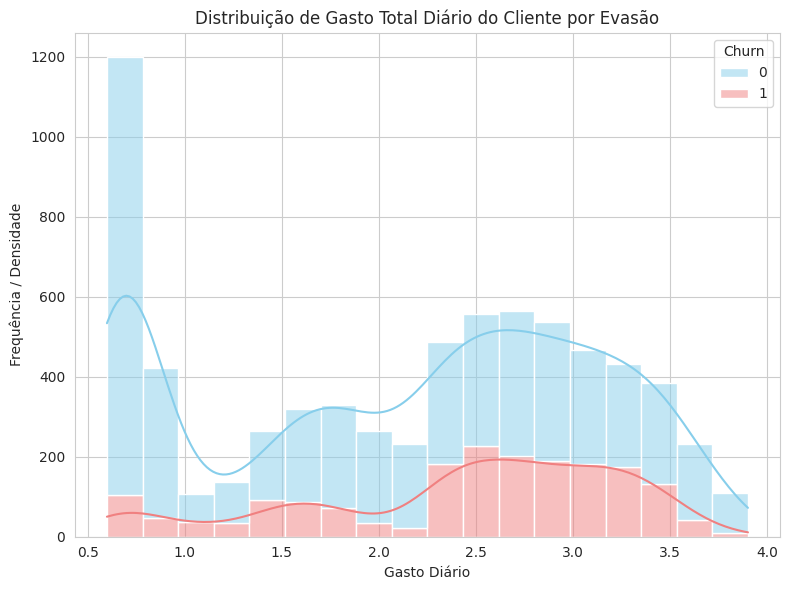

In [47]:
coluna_numerica_analise = 'Contas_Diarias'

if coluna_numerica_analise in df.columns:
    print(f"\n--- Análise de Evasão por Variável Numérica: Gasto Total Diário ---")

    # Estatísticas Descritivas por Grupo de Churn
    print("\nEstatísticas Descritivas por grupo de Evasão:")
    # Usando agg para selecionar métricas específicas:
    desc_stats_churn = df.groupby('Churn')[coluna_numerica_analise].agg(['mean', 'median', 'std', 'min', 'max'])
    print(desc_stats_churn.round(2))

    # Visualizações Comparativas
    plt.figure(figsize=(8, 6))

    # Histograma/KDE Sobreposto
    sns.histplot(data=df, x=coluna_numerica_analise, hue='Churn', kde=True, palette=['skyblue', 'lightcoral'], multiple="stack")
    plt.title(f'Distribuição de Gasto Total Diário do Cliente por Evasão')
    plt.xlabel('Gasto Diário')
    plt.ylabel('Frequência / Densidade')

    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_numerica_analise}' não encontrada.")

# 📄 4. Relatório Final

## Challenge Telecom X: Análise de Evasão de Clientes
---

**Autor(a):** Vitor Freitas
**Data:** 02/06/2025
**Programa:** Oracle Next Education - Alura | Trilha Data Science

---

### 1. Introdução

Nesta seção, o objetivo é apresentar o contexto do desafio e a importância da análise de evasão de clientes (churn) para a empresa fictícia Telecom X.

**Objetivo da Análise:**
O presente projeto teve como finalidade principal realizar uma análise exploratória sobre os dados de clientes da Telecom X. O foco foi identificar os principais fatores e padrões associados à evasão de clientes (churn), com o intuito de fornecer insights que possam auxiliar a empresa na formulação de estratégias para aumentar a retenção e reduzir o cancelamento de serviços.

**O Problema de Evasão de Clientes (Churn):**
A evasão de clientes, ou churn, representa a taxa na qual clientes deixam de utilizar os serviços ou produtos de uma empresa durante um determinado período. Para empresas de telecomunicações como a Telecom X, uma alta taxa de churn pode ter impactos significativos, incluindo:
* Perda de receita recorrente.
* Custos elevados para aquisição de novos clientes, que geralmente superam os custos de retenção dos existentes.
* Potencial impacto negativo na reputação e na percepção de valor da marca no mercado.

Compreender os motivos que levam os clientes a cancelar seus serviços é, portanto, fundamental para o desenvolvimento de ações proativas e direcionadas, visando melhorar a satisfação do cliente, aumentar a lealdade e garantir a sustentabilidade do negócio a longo prazo.

---


### 2. Limpeza e Tratamento de Dados

Nesta seção, descrevemos os passos metodológicos adotados para a coleta, limpeza, transformação e preparação dos dados dos clientes da Telecom X, garantindo sua qualidade e adequação para as análises subsequentes.

* **Coleta e Carregamento dos Dados:**
    * Os dados brutos foram fornecidos em um arquivo no formato JSON, contendo informações diversas sobre os clientes, seus serviços contratados e status de churn.
    * Utilizou-se a biblioteca Pandas do Python para carregar os dados. Devido à estrutura aninhada do JSON, a função `pd.json_normalize()` foi empregada para "achatar" os dados em um formato tabular (DataFrame), facilitando sua manipulação e análise.

* **Inspeção Inicial e Estrutural:**
    * Após o carregamento, foi realizada uma inspeção inicial do DataFrame utilizando métodos como `df.info()`, `df.shape`, `df.head()`, e `df.dtypes` para compreender a dimensionalidade do conjunto de dados, os tipos de dados inferidos para cada coluna e a contagem de valores não nulos.

* **Tratamento de Valores Ausentes (NaNs):**
    * A coluna `account_Charges_Total` apresentou valores problemáticos (strings vazias ou espaços) que, após conversão para formato numérico, resultaram em valores ausentes (`NaN`). Foi investigado que esses `NaN`s correspondiam a clientes com 0 meses de contrato (`customer_tenure`). Estes foram então imputados com o valor `0.0`, refletindo a ausência de cobrança total acumulada para novos clientes.
    * A coluna `Churn` (variável alvo) também apresentou strings vazias (`''`). Estas foram primeiramente convertidas para `NaN` e, subsequentemente, as linhas contendo `Churn` ausente foram removidas do DataFrame para garantir a integridade da variável alvo para a análise de evasão.
    * Após todos os tratamentos, verificou-se que o DataFrame final não continha mais valores ausentes (`df.isnull().sum().sum() == 0`).

* **Tratamento de Duplicatas:**
    * Foi realizada uma verificação para identificar linhas duplicadas no conjunto de dados, não sendo encontradas duplicatas.

* **Correção de Tipos de Dados:**
    * A coluna `account_Charges_Total` foi convertida do tipo `object` para o tipo numérico `float64` para permitir cálculos e análises estatísticas.

* **Engenharia de Features (Criação de Novas Colunas):**
    * Foi criada a coluna `Contas_Diarias` através da divisão da coluna `account_Charges_Monthly` por uma média de dias no mês (30.4375), mantendo a precisão original do cálculo.

* **Padronização e Transformação de Dados:**
    * **Mapeamento de Categóricas para Binário:** Colunas com respostas textuais binárias (ex: "Yes"/"No" em `customer_Partner`, `phone_PhoneService`) foram mapeadas para valores numéricos `1` e `0` respectivamente.
    * Colunas categóricas com três estados (ex: `phone_MultipleLines` e os serviços adicionais de internet, ex: `internet_OnlineSecurity`, onde havia "Yes", "No", e "No X service") também foram convertidas para um formato binário (`1` para 'Yes', e `0` para 'No' ou 'No X service'), simplificando-as para indicar a posse ou não do serviço específico.
    * **Renomeação de Colunas:** Os nomes das colunas foram padronizados (ex: `customer_gender`, `account_Charges_Monthly`).
---

### 3. Análise Exploratória de Dados (EDA)

Nesta seção, são apresentados os principais achados da análise exploratória, com foco em identificar padrões e relações entre as variáveis e a evasão de clientes. As visualizações são cruciais para ilustrar essas descobertas.

* **Análise Descritiva Geral:**
    * O conjunto de dados final, após limpeza e tratamento, consiste em **7043** clientes e **22** variáveis.
    * A taxa de churn geral observada na base de clientes analisada é de aproximadamente **26.5%** (com 73.5% de clientes não evadindo).

* **Distribuição de Variáveis Chave:**
    * **Tempo de Contrato (`customer_tenure`):** A média de tempo de contrato é de **32.37** meses, com uma mediana de **29** meses. A distribuição é **assimétrica à direita, indicando uma concentração maior de clientes com tempo de contrato mais curto e alguns clientes com tempo de contrato consideravelmente mais longo.**
    * **Cobranças Mensais (`account_Charges_Monthly`):** A cobrança mensal média é de R$**64.76**, variando de R$**18.25** a R$**118.75**.
    * **Tipo de Contrato (`account_Contract`):** A maioria dos clientes (**55.02%**) está em contratos do tipo "Month-to-month".

* **Relação das Variáveis com o Churn (Análise Bivariada):**
    * **Variáveis Categóricas vs. Churn:**
        * **Tipo de Contrato (`account_Contract`):** Observou-se que clientes com contrato "Month-to-month" apresentam uma taxa de churn de **42.71%**, significativamente superior aos contratos de "One year" (**11.27%**) e "Two year" (**2.83%**).
        * **Serviço de Internet (`internet_InternetService`):** Observou-se uma variação significativa na taxa de churn conforme o tipo de serviço de internet. Clientes com 'Fiber optic' apresentaram a maior taxa de churn (**41.89%**), seguidos por clientes com 'DSL' (**18.96%**). Aqueles sem serviço de internet da empresa ('No') tiveram a menor taxa de churn (**7.4%**).
        * **Método de Pagamento (`account_PaymentMethod`):** O método de pagamento "Electronic check" esteve associado à maior taxa de churn (**45.29%**). Outros métodos como "Credit card (automatic)" (**15.24%**), "Bank transfer (automatic)" (**16.71%**), e "Mailed check" (**19.11%**) apresentaram taxas consideravelmente menores.
    * **Análise de Evasão por Variáveis Numéricas:**
        * **Tempo de Contrato (`customer_tenure`):** Clientes que evadiram tinham, em média, **17.98** meses de contrato, enquanto os que permaneceram tinham, em média, **37.57** meses. A mediana também mostrou uma diferença clara (**10** meses para quem evadiu vs. **38** meses para quem ficou).
        * **Cobranças Mensais (`account_Charges_Monthly`):** Clientes que cancelaram o serviço apresentavam uma cobrança mensal média de R$**74.44**, em comparação com R$**61.27** para os que ficaram.
        * **Cobranças Totais (`account_Charges_Total`):** Em termos de cobranças totais acumuladas, os clientes que evadiram registraram uma média de R$**1531.80** (mediana de R$**703.55**), valor inferior à média de R$**2549.91** (mediana de R$**1679.52**) dos clientes que permaneceram. Isso se alinha com o menor tempo de contrato dos clientes que cancelaram.
        * **Contas Diárias (`Contas_Diarias`):** De forma similar às cobranças mensais, as contas diárias médias foram maiores para clientes que evadiram (R$**2.45**, mediana R$**2.62**) em comparação com os que não evadiram (R$**2.01**, mediana R$**2.12**).
---

### 4. Conclusões e Insights

Com base na análise exploratória de dados, foram identificados diversos fatores e padrões que parecem influenciar a decisão de um cliente em cancelar os serviços da Telecom X. Os principais insights são:

* **Contratos Mensais como Principal Fator de Risco:** Clientes com contratos "Month-to-month" representam o grupo com a maior taxa de evasão. A flexibilidade desse tipo de contrato parece facilitar a saída do cliente.
* **Importância do Tempo de Contrato (Tenure):** Há uma clara correlação negativa entre o tempo que um cliente permanece na empresa e sua probabilidade de churn. Clientes mais novos são significativamente mais propensos a cancelar.
* **Impacto das Cobranças Mensais/Diárias:** Clientes que evadiram tendem a ter cobranças mensais e diárias mais altas, sugerindo que o custo pode ser um fator decisivo para o cancelamento.
* **Influência do Tipo de Serviço de Internet:** Clientes que utilizam 'Fiber optic' demonstraram a maior taxa de churn (41.89%) entre os usuários de internet, superando os clientes com 'DSL' (18.96%). Embora a fibra ótica seja um serviço premium, **sugere-se que seu custo potencialmente mais elevado pode ser um fator contribuinte para essa maior taxa de evasão.** Clientes sem serviço de internet da empresa apresentaram a menor taxa de churn (7.4%).
* **Método de Pagamento:** O método "Electronic check" esteve associado a uma taxa de churn significativamente mais elevada (45.29%). Isso pode sugerir um menor nível de comprometimento do cliente por ser um método menos automatizado, ou pode estar relacionado a uma maior ocorrência de falhas no processamento de pagamentos, burocracia e menor comodidade em comparação com métodos automáticos, gerando frustração.

Esses achados são cruciais pois permitem à Telecom X direcionar seus esforços de retenção de forma mais eficaz, focando nos segmentos de clientes e nos aspectos do serviço que se mostraram mais críticos.

---

### 5. Recomendações

Com base nas conclusões e insights obtidos, as seguintes recomendações são propostas para a Telecom X com o objetivo de reduzir a evasão de clientes:

1.  **Estratégias para Contratos Mensais:**
    * Desenvolver campanhas ativas para incentivar clientes com contratos "Month-to-month" a migrarem para planos de maior duração (1 ou 2 anos), oferecendo descontos progressivos, benefícios adicionais ou bônus de fidelidade.
    * Revisar a proposta de valor dos planos mensais para entender se o preço ou os serviços oferecidos estão alinhados com as expectativas do mercado.

2.  **Foco na Retenção de Novos Clientes (Baixo Tenure):**
    * Implementar um programa de "onboarding" mais robusto e acompanhamento proativo para clientes nos primeiros meses de contrato (ex: primeiros 3-6 meses).
    * Oferecer suporte técnico prioritário ou canais de atendimento dedicados para novos clientes para garantir uma boa experiência inicial.

3.  **Análise e Otimização de Preços e Planos:**
    * Investigar a satisfação dos clientes com os diferentes tipos de serviço de internet, especialmente aqueles com maior taxa de churn (como Fiber Optic), e considerar se o custo-benefício percebido está adequado ou se há problemas de estabilidade/serviço que anulam as vantagens da tecnologia.

4.  **Revisão dos Métodos de Pagamento:**
    * Analisar a experiência do cliente com o método de pagamento "Electronic check" para identificar e solucionar possíveis pontos de atrito (ex: falhas, dificuldade de uso).
    * Incentivar ativamente a adoção de métodos de pagamento automáticos e mais convenientes (como débito automático em cartão de crédito ou conta bancária), possivelmente oferecendo pequenos descontos ou benefícios para quem optar por esses métodos.

5.  **Monitoramento Contínuo e Modelagem Preditiva:**
    * Recomenda-se que a Telecom X continue monitorando essas métricas e padrões de churn regularmente.
    * Os dados preparados e os insights desta análise servem como uma excelente base para o desenvolvimento de modelos preditivos de churn, que podem identificar clientes com alto risco de evasão antes que eles efetivamente cancelem, permitindo ações de retenção ainda mais personalizadas e proativas.

---